In [3]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [4]:
train = pd.read_pickle("train16_ext_06122022.pkl")

In [5]:
test = pd.read_pickle("test16_ext_06122022.pkl")

In [6]:
test.isnull().sum()

tweet_id                      0
lang                          0
res_image_vectors             0
vgg_image_vectors             0
tweet_text                    0
label                         0
event                         0
new_img_id                    0
clean_tweet                   0
text_feats_1                  0
text_feats_2                  0
pooler                        0
sm_last_four_concat           0
mn_last_four_concat           0
mn_2ndtolast_lyr              0
sm_2ndtolast_lyr              0
num_friends                   0
num_followers                 0
folfriend_ratio               0
times_listed                  0
has_url                       0
is_verified                   0
num_posts                     0
num_words                     0
text_length                   0
contains_questmark            0
num_questmark                 0
contains_exclammark           0
num_exclammark                0
contains_happyemo             0
contains_sademo               0
contains

In [7]:
train = train.fillna(0)
test = test.fillna(0)

In [8]:
new_train = train  
new_test = test

new_train['has_url'] = train['has_url'].astype(int)
new_train['is_verified'] = train['is_verified'].astype(int)
new_train['contains_questmark'] = train['contains_questmark'].astype(int)
new_train['contains_exclammark'] = train['contains_exclammark'].astype(int)
new_train['contains_happyemo'] = train['contains_happyemo'].astype(int)
new_train['contains_sademo'] = train['contains_sademo'].astype(int)
new_train['contains_firstorderpron'] = train['contains_secondorderpron'].astype(int)
new_train['contains_secondorderpron'] = train['contains_secondorderpron'].astype(int)
new_train['contains_thirdorderpron'] = train['contains_thirdorderpron'].astype(int)

new_test['has_url'] = test['has_url'].astype(int)
new_test['is_verified'] = test['is_verified'].astype(int)
new_test['contains_questmark'] = test['contains_questmark'].astype(int)
new_test['contains_exclammark'] = test['contains_exclammark'].astype(int)
new_test['contains_happyemo'] = test['contains_happyemo'].astype(int)
new_test['contains_sademo'] = test['contains_sademo'].astype(int)
new_test['contains_firstorderpron'] = test['contains_secondorderpron'].astype(int)
new_test['contains_secondorderpron'] = test['contains_secondorderpron'].astype(int)
new_test['contains_thirdorderpron'] = test['contains_thirdorderpron'].astype(int)

In [9]:
new_train['new_features'] = new_train[['num_friends', 'num_followers', 'folfriend_ratio', 'times_listed',
       'has_url', 'is_verified', 'num_posts', 'num_words', 'text_length',
       'contains_questmark', 'num_questmark', 'contains_exclammark',
       'num_exclammark', 'contains_happyemo', 'contains_sademo',
       'contains_firstorderpron', 'contains_secondorderpron',
       'contains_thirdorderpron', 'num_uppercasechars', 'num_mentions', 'num_hashtags', 'num_URLs',
       'num_retweets']].values.tolist()

new_test['new_features'] = new_test[['num_friends', 'num_followers', 'folfriend_ratio', 'times_listed',
       'has_url', 'is_verified', 'num_posts', 'num_words', 'text_length',
       'contains_questmark', 'num_questmark', 'contains_exclammark',
       'num_exclammark', 'contains_happyemo', 'contains_sademo',
       'contains_firstorderpron', 'contains_secondorderpron',
       'contains_thirdorderpron', 'num_uppercasechars','num_mentions', 'num_hashtags', 'num_URLs',
       'num_retweets']].values.tolist()

In [10]:
# create function to recode label field
def recode_annotation(txt_field):
    if txt_field == "fake":
        return 1
    else:
        return 0

# run function to recode label field.
train_labels = train['label'].apply(recode_annotation)
test_labels = test['label'].apply(recode_annotation)

In [11]:
print(train_labels.ravel())
print(test_labels.ravel())

[1 1 1 ... 0 0 0]
[0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 1 1 

In [13]:
train.columns

Index(['tweet_id', 'lang', 'res_image_vectors', 'vgg_image_vectors',
       'tweet_text', 'label', 'event', 'new_img_id', 'clean_tweet', 'cl_len',
       'text_feats_1', 'text_feats_2', 'pooler', 'sm_last_four_concat',
       'mn_last_four_concat', 'mn_2ndtolast_lyr', 'sm_2ndtolast_lyr',
       'num_friends', 'num_followers', 'folfriend_ratio', 'times_listed',
       'has_url', 'is_verified', 'num_posts', 'num_words', 'text_length',
       'contains_questmark', 'num_questmark', 'contains_exclammark',
       'num_exclammark', 'contains_happyemo', 'contains_sademo',
       'contains_firstorderpron', 'contains_secondorderpron',
       'contains_thirdorderpron', 'num_uppercasechars', 'num_possentiwords',
       'num_negsentiwords', 'num_mentions', 'num_hashtags', 'num_URLs',
       'num_retweets', 'new_features'],
      dtype='object')

In [14]:
train_txt = train['text_feats_1'].apply(pd.Series)
train_img = train['vgg_image_vectors'].apply(pd.Series)

In [15]:
train_info = new_train['new_features'].apply(pd.Series)

In [16]:
test_txt = test['text_feats_1'].apply(pd.Series)
test_img = test['vgg_image_vectors'].apply(pd.Series)

In [17]:
test_info = new_test['new_features'].apply(pd.Series)

In [216]:
np.save('train_txt',train_txt)
np.save('train_img',train_img)
np.save('train_info',train_info)
np.save('test_txt',test_txt)
np.save('test_img',test_img)
np.save('test_info',test_info)

In [18]:
train_info.shape

(9140, 23)

In [19]:
test_info.shape

(796, 23)

In [35]:
train_fill = pd.DataFrame(np.ones((9140,177))*(0))
test_fill = pd.DataFrame(np.ones((796,177))*(0))

In [36]:
train_info_fill = pd.concat([train_info.T,train_fill.T])
train_info_fill

0           1           2          3           4          5     \
0    1445.000000  565.000000  576.000000  61.000000   95.000000  78.000000   
1     634.000000  271.000000  649.000000  60.000000  210.000000  25.000000   
2       0.438754    0.479646    1.126736   0.983607    2.210526   0.320513   
3       1.000000   11.000000   28.000000   0.000000    1.000000   4.000000   
4       1.000000    0.000000    1.000000   0.000000    0.000000   0.000000   
..           ...         ...         ...        ...         ...        ...   
172     0.000000    0.000000    0.000000   0.000000    0.000000   0.000000   
173     0.000000    0.000000    0.000000   0.000000    0.000000   0.000000   
174     0.000000    0.000000    0.000000   0.000000    0.000000   0.000000   
175     0.000000    0.000000    0.000000   0.000000    0.000000   0.000000   
176     0.000000    0.000000    0.000000   0.000000    0.000000   0.000000   

            6            7            8           9     ...         9130  \
0     529.000000  1982.000000   519.000000  420.000000  ...  1092.000000   
1    2434.000000  1528.000000  3273.000000   65.000000  ...   716.000000   
2       4.601134     0.770938     6.306358    0.154762  ...     0.655678   
3      43.000000    39.000000    75.000000    0.000000  ...     8.000000   
4       1.000000     1.000000     0.000000    1.000000  ...     1.000000   
..           ...          ...          ...         ...  ...          ...   
172     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
173     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
174     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
175     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
176     0.000000     0.000000     0.000000    0.000000  ...     0.000000   

           9131        9132         9133         9134        9135  \
0    586.000000  932.000000  1514.000000  3121.000000   73.000000   
1    334.000000  199.000000   383.000000  9069.000000  112.000000   
2      0.569966    0.213519     0.252972     2.905799    1.534247   
3      1.000000    5.000000     8.000000   159.000000    0.000000   
4      0.000000    0.000000     1.000000     0.000000    0.000000   
..          ...         ...          ...          ...         ...   
172    0.000000    0.000000     0.000000     0.000000    0.000000   
173    0.000000    0.000000     0.000000     0.000000    0.000000   
174    0.000000    0.000000     0.000000     0.000000    0.000000   
175    0.000000    0.000000     0.000000     0.000000    0.000000   
176    0.000000    0.000000     0.000000     0.000000    0.000000   

            9136         9137        9138         9139  
0    1092.000000  2760.000000  531.000000  1989.000000  
1     919.000000  2557.000000  128.000000  1131.000000  
2       0.841575     0.926449    0.241055     0.568627  
3       7.000000    10.000000    0.000000    16.000000  
4       0.000000     0.000000    0.000000     1.000000  
..           ...          ...         ...          ...  
172     0.000000     0.000000    0.000000     0.000000  
173     0.000000     0.000000    0.000000     0.000000  
174     0.000000     0.000000    0.000000     0.000000  
175     0.000000     0.000000    0.000000     0.000000  
176     0.000000     0.000000    0.000000     0.000000  

[200 rows x 9140 columns]

In [37]:
test_info_fill = pd.concat([test_info.T,test_fill.T])
test_info_fill

0             1            2            3            4    \
0     15.000000   5062.000000   413.000000  1019.000000  1894.000000   
1    155.000000  56162.000000  3869.000000   832.000000  1188.000000   
2     10.333333     11.094824     9.368039     0.816487     0.627244   
3     18.000000    117.000000    24.000000    26.000000    15.000000   
4      1.000000      1.000000     1.000000     1.000000     1.000000   
..          ...           ...          ...          ...          ...   
172    0.000000      0.000000     0.000000     0.000000     0.000000   
173    0.000000      0.000000     0.000000     0.000000     0.000000   
174    0.000000      0.000000     0.000000     0.000000     0.000000   
175    0.000000      0.000000     0.000000     0.000000     0.000000   
176    0.000000      0.000000     0.000000     0.000000     0.000000   

             5           6             7           8           9    ...   786  \
0    1018.000000   14.000000   5062.000000  1112.00000  445.000000  ...  20.0   
1    1123.000000  648.000000  56162.000000   458.00000  497.000000  ...  20.0   
2       1.103144   46.285713     11.094824     0.41187    1.116854  ...   1.0   
3      42.000000   68.000000    117.000000    21.00000    1.000000  ...   0.0   
4       1.000000    1.000000      1.000000     1.00000    1.000000  ...   1.0   
..           ...         ...           ...         ...         ...  ...   ...   
172     0.000000    0.000000      0.000000     0.00000    0.000000  ...   0.0   
173     0.000000    0.000000      0.000000     0.00000    0.000000  ...   0.0   
174     0.000000    0.000000      0.000000     0.00000    0.000000  ...   0.0   
175     0.000000    0.000000      0.000000     0.00000    0.000000  ...   0.0   
176     0.000000    0.000000      0.000000     0.00000    0.000000  ...   0.0   

           787         788         789         790          791         792  \
0    1291.0000  727.000000  540.000000  253.000000   6544.00000  771.000000   
1     185.0000  265.000000  370.000000  536.000000  11018.00000  234.000000   
2       0.1433    0.364512    0.685185    2.118577      1.68368    0.303502   
3       5.0000    4.000000    4.000000    7.000000     70.00000    6.000000   
4       1.0000    1.000000    1.000000    1.000000      1.00000    1.000000   
..         ...         ...         ...         ...          ...         ...   
172     0.0000    0.000000    0.000000    0.000000      0.00000    0.000000   
173     0.0000    0.000000    0.000000    0.000000      0.00000    0.000000   
174     0.0000    0.000000    0.000000    0.000000      0.00000    0.000000   
175     0.0000    0.000000    0.000000    0.000000      0.00000    0.000000   
176     0.0000    0.000000    0.000000    0.000000      0.00000    0.000000   

           793        794         795  
0    81.000000  48.000000  201.000000  
1    22.000000   4.000000  624.000000  
2     0.271605   0.083333    3.104478  
3     0.000000   1.000000  168.000000  
4     1.000000   1.000000    1.000000  
..         ...        ...         ...  
172   0.000000   0.000000    0.000000  
173   0.000000   0.000000    0.000000  
174   0.000000   0.000000    0.000000  
175   0.000000   0.000000    0.000000  
176   0.000000   0.000000    0.000000  

[200 rows x 796 columns]

# Samples N

In [ ]:
n = 0.23
p = 5
train_txt_n, X1_test, y1_train, y1_test = train_test_split(train_txt, train_labels,test_size=n, random_state=p,stratify=train_labels)
train_img_n, X2_test, y2_train, y2_test = train_test_split(train_img, train_labels,test_size=n, random_state=p,stratify=train_labels)

print(np.all(y1_train == y2_train))
print(np.all(y1_test == y2_test))
print(train_txt_n.shape)
print(np.mean(train_txt_n))

In [ ]:
np.save('train_txt',train_txt_n)
np.save('train_img',train_img_n)
np.save('test_txt',test_txt)
np.save('test_img',test_img)

# StandardScaler - Training

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


#instantiate scaler on training data
scl_txt = StandardScaler(with_mean = True, with_std = False)
scl_img = StandardScaler(with_mean = True, with_std = False)
scl_info = StandardScaler(with_mean = True, with_std = True)

X_scaled = scl_txt.fit_transform(train_txt)

Y_scaled = scl_img.fit_transform(train_img)

Z_scaled = scl_info.fit_transform(train_info_fill.T)

print("Text Training Data dims:", X_scaled.shape)

print("Image Training Data dims:", Y_scaled.shape)

print("Info Training Data dims:", Z_scaled.shape)

Text Training Data dims: (9140, 300)
Image Training Data dims: (9140, 4096)
Info Training Data dims: (9140, 200)


In [39]:
np.argwhere(np.isnan(Z_scaled))

array([], shape=(0, 2), dtype=int64)

# PCA -  Training

In [40]:
# import packages for modeling
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA

pca_txt_mod = PCA(n_components = 200, svd_solver='full')

pca_img_mod = PCA(n_components = 200, svd_solver='full')

pca_info_mod = PCA(n_components = 100, svd_solver='full')

In [41]:
# Fit and transform text data
X = pca_txt_mod.fit_transform(X_scaled)

# Look at dims of transformed data

print("PCA training results - text: ", X.shape)

PCA training results - text:  (9140, 200)


In [42]:
# Fit and transform image data
Y = pca_img_mod.fit_transform(Y_scaled)


# Look at dims of transformed data
print("PCA training results - image: ", Y.shape)

PCA training results - image:  (9140, 200)


In [43]:
#Z = pca_info_mod.fit_transform(Z_scaled)
Z = Z_scaled

# Look at dims of transformed data
print("PCA training results - image: ", Z.shape)

PCA training results - image:  (9140, 200)


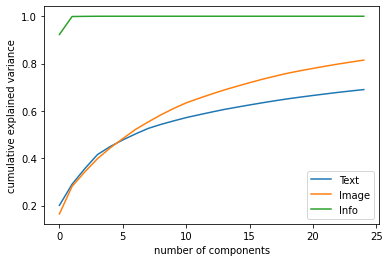

In [223]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_txt_mod.explained_variance_ratio_),label='Text')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


plt.plot(np.cumsum(pca_img_mod.explained_variance_ratio_),label='Image')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.plot(np.cumsum(pca_info_mod.explained_variance_ratio_),label='Info')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.legend()

# Testing

In [44]:
X_scaled_test = scl_txt.transform(test_txt)

Y_scaled_test = scl_img.transform(test_img)

Z_scaled_test = scl_info.transform(test_info_fill.T)

In [45]:
test_txt_pca = pca_txt_mod.transform(X_scaled_test)
test_img_pca = pca_img_mod.transform(Y_scaled_test)
#test_info_pca = pca_info_mod.transform(Z_scaled_test)
test_info_pca = Z_scaled_test

print("PCA testing results - text: ", test_txt_pca.shape)

print("PCA testing results - image: ", test_img_pca.shape)

print("PCA testing results - info: ", test_info_pca.shape)

PCA testing results - text:  (796, 200)
PCA testing results - image:  (796, 200)
PCA testing results - info:  (796, 200)


In [48]:
np.savetxt("pca_train_txt.csv", X, delimiter=",")
np.savetxt("pca_train_img_vgg.csv", Y, delimiter=",")
np.savetxt("pca_train_info.csv", Z, delimiter=",")

In [49]:
test_info_pca

array([[-0.20041379, -0.05432234, -0.01905771, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.96449073,  0.30341788, -0.01883724, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1085509 , -0.03059946, -0.01933718, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.18518024, -0.05517187, -0.02197077, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19279701, -0.05528684, -0.02202528, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15748289, -0.05132664, -0.0211506 , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
np.save('pca_test_txt', test_txt_pca)
np.save('pca_test_img_vgg', test_img_pca)
np.save('pca_test_info', test_info_pca)

In [51]:
np.save('train_labels', train_labels.ravel())
np.save('test_labels', test_labels.ravel())

# Explainability

In [58]:
# ### IVA-M-EMK
import scipy.io as sio

# Loanding W
IVA_M_EMK = sio.loadmat('W_IVA_M_EMK.mat')
W_IVA_M_EMK = IVA_M_EMK['W_IVA_M_EMK']


# Split W into two matrix to get a W1 for X and a W2  for Y.
W1_IVA_M_EMK, W2_IVA_M_EMK, W3_IVA_M_EMK = np.split(W_IVA_M_EMK, 3, axis = 2)
W1_IVA_M_EMK = np.squeeze(W1_IVA_M_EMK, axis = 2)
W2_IVA_M_EMK = np.squeeze(W2_IVA_M_EMK, axis = 2)
W3_IVA_M_EMK = np.squeeze(W3_IVA_M_EMK, axis = 2)

# Generate S1 and S2

S1_tr = np.transpose(X) #Text Components
S2_tr = np.transpose(Y) #Image Components
S3_tr = np.transpose(Z) #Image Components

S1_test = np.transpose(test_txt_pca) #Text Components
S2_test = np.transpose(test_img_pca) #Image Components
S3_test = np.transpose(test_info_pca) #Image Components


#df_IVA_M_EMK = np.concatenate((S1_tr,S2_tr))
#df_IVA_M_EMK = df_IVA_M_EMK.T

#df_test_IVA_M_EMK = np.concatenate((S1_test,S2_test))
#df_test_IVA_M_EMK = df_test_IVA_M_EMK.T

#S1_tr = S1_tr.T
#S2_tr = S2_tr.T

#S1_test = S1_test.T
#S2_test = S2_test.T

#df_IVA_M_EMK = (S1_tr + S2_tr)/2
#df_test_IVA_M_EMK = (S1_test + S2_test)/2


    

In [62]:
df_IVA_M_EMK = (S1_tr + S2_tr + S3_tr)/3

df_test_IVA_M_EMK = (S1_test + S2_test + S3_test)/3

In [33]:
df_IVA_M_EMK = np.concatenate((df_IVA_M_EMK,Z_scaled.T))
df_test_IVA_M_EMK = np.concatenate((df_test_IVA_M_EMK,Z_scaled_test.T))

In [38]:
df_IVA_M_EMK = np.concatenate((S1_tr,S2_tr,S3_tr))
df_test_IVA_M_EMK = np.concatenate((S1_test,S2_test,S3_test))

In [81]:
Z_scaled

array([[ 0.12964634, -0.05126277, -0.02192238, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07346758, -0.0535814 , -0.02191054, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07092866, -0.05116696, -0.02172319, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.43316317, -0.03897976, -0.02178118, ...,  0.        ,
         0.        ,  0.        ],
       [-0.08131517, -0.0544948 , -0.02197962, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25520768, -0.04808822, -0.02188478, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
svm = SVC()
svm.fit(df_IVA_M_EMK.T,train_labels)

SVC()

In [64]:
pred_svm = svm.predict(df_test_IVA_M_EMK.T)

In [65]:
iva_clc_rpt = classification_report(test_labels, pred_svm, target_names=['Real', 'Fake'], digits=4)
print(iva_clc_rpt)

              precision    recall  f1-score   support

        Real     0.5310    0.3647    0.4324       329
        Fake     0.6333    0.7730    0.6962       467

    accuracy                         0.6043       796
   macro avg     0.5822    0.5689    0.5643       796
weighted avg     0.5910    0.6043    0.5872       796



In [115]:
iva_clc_rpt = classification_report(test_labels, pred_svm, target_names=['Real', 'Fake'], digits=4)
print(iva_clc_rpt)

              precision    recall  f1-score   support

        Real     0.5360    0.3617    0.4319       329
        Fake     0.6341    0.7794    0.6993       467

    accuracy                         0.6068       796
   macro avg     0.5851    0.5706    0.5656       796
weighted avg     0.5936    0.6068    0.5888       796



In [ ]:
S1_tr[0]

In [ ]:
S2_tr[0]

# Classifier only Text

In [ ]:
svm_txt = SVC(probability=True)
svm_txt.fit(train_txt,train_labels)

pred_svm_txt = svm_txt.predict(test_txt)

print(classification_report(test_labels, pred_svm_txt, target_names=['Real', 'Fake'], digits=4))

# Classifier TEXT * W

In [ ]:
svm_txt_W1 = SVC(probability=True)
svm_txt_W1.fit(S1_tr.T,train_labels)

pred_svm_txt_W1 = svm_txt_W1.predict(S1_test.T)

print(classification_report(test_labels, pred_svm_txt_W1, target_names=['Real', 'Fake'], digits=4))

# Classifier only Image

In [ ]:
svm_img = SVC(probability=True)
svm_img.fit(train_img,train_labels)

pred_svm_img = svm_img.predict(test_img)

print(classification_report(test_labels, pred_svm_img, target_names=['Real', 'Fake'], digits=4))

In [ ]:
joblib.dump(pred_svm_img, 'model_GS_img_W2.pkl')

# Classifier IMAGE * W

In [ ]:
svm_img_W2 = SVC(probability=True)
svm_img_W2.fit(S2_tr.T,train_labels)

pred_svm_img_W2 = svm_img_W2.predict(S2_test.T)

print(classification_report(test_labels, pred_svm_img_W2, target_names=['Real', 'Fake'], digits=4))

# LIME for Text

In [ ]:
X_test = test['clean_tweet'].str.join(' ')
w2v_test = test['text_feats_1']
text_test = np.array(X_test)
original_txt = test['tweet_text']
labels_test = np.array(test_labels)
id_image = test['new_img_id']
event = test['event']

preds = pred_svm_txt
predsW = pred_svm_txt_W1

testing = pd.DataFrame([(original_txt),(text_test),(labels_test),(predsW),(preds),(id_image),(event)],index=['original_txt','text','labels','preds_W','preds','id_image','event'])
pd_testing = testing.T

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

data_path= "DATAPATH"
%time w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print('done loading Word2Vec')

In [ ]:
 # Creating a feature vector by averaging all embeddings for all sentences

class word2vecVectorizer:

    def __init__(self):
        
        self.word2vec = w2v_model
        
    def fit(self, list_of_lists, *args):
        pass
    
    
    def transform(self, data, *args):
        DIMENSION = 300
        X = np.zeros((len(data),DIMENSION))
        n = 0
        emptycount = 0
        words = []
        words_nf = []
        
        data = pd.Series(data).str.split()
        
        for tokens in data:
            vecs = []
            for token in tokens:
                if token in self.word2vec:
                    vec = self.word2vec[token]
                    vecs.append(vec)
                    words.append(token)        
                else:            
                    words_nf.append(token)
                    emptycount +=1
    
            if len(vecs) > 0:
                vecs = np.array(vecs)
                vec = vecs.mean(axis=0)
                X[n] = vec
                
            n +=1
        
        words_main = list(dict.fromkeys(words))
        words_nf_main = list(dict.fromkeys(words_nf))
        #print(len(words),'Words found:' ,words_main)
        #print("")
        #print(len(words_nf),"Words NOT found:", words_nf_main)
        
        words.clear()
        words_nf.clear()
        return X
    
    def fit_transform(self, X, *args):
        self.fit(X,*args)
        return self.transform(X,*args)

In [ ]:
 # Creating a feature vector by averaging all embeddings for all sentences

class word2vecVectorizerW:

    def __init__(self):
        
        self.word2vec = w2v_model
        
    def fit(self, list_of_lists, *args):
        pass
    
    
    def transform(self, data, *args):
        DIMENSION = 100
        X = np.zeros((len(data),DIMENSION))
        n = 0
        emptycount = 0
        words = []
        words_nf = []
        
        data = pd.Series(data).str.split()
        
        for tokens in data:
            vecs = []
            for token in tokens:
                if token in self.word2vec:
                    vec = self.word2vec[token]
                    vecs.append(vec)
                    words.append(token)        
                else:            
                    words_nf.append(token)
                    emptycount +=1
    
            if len(vecs) > 0:
                vecs = np.array(vecs)
                vec = vecs.mean(axis=0)
                # IVA - W
                vec_std = scl_txt.transform(np.reshape(vec,(1,300)))
                vec_pca = pca_txt_mod.transform(vec_std)
                X[n] = W1_IVA_M_EMK @ np.transpose(vec_pca.ravel())
                
            n +=1
        
        words_main = list(dict.fromkeys(words))
        words_nf_main = list(dict.fromkeys(words_nf))
        #print(len(words),'Words found:' ,words_main)
        #print("")
        #print(len(words_nf),"Words NOT found:", words_nf_main)
        
        words.clear()
        words_nf.clear()
        return X
    
    def fit_transform(self, X, *args):
        self.fit(X,*args)
        return self.transform(X,*args)

In [ ]:
vect = word2vecVectorizer() # just for W2V
#vect_W = word2vecVectorizerW() # W2V with W*w2v features

# Fakes

In [ ]:
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 800)
ex1 = pd_testing[(pd_testing.preds_W == 1)]
ex2 = ex1[(ex1.labels == 0)]
ex3 = ex2[(ex2.preds==0)]
ex3

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(vect,svm_txt)
mystring = 'weird strong see eiffel tower like means lot paris city lights pain today'
print(mystring)

explainer = LimeTextExplainer(class_names=['Real','Fake'])

exp = explainer.explain_instance(mystring, pipe.predict_proba, top_labels=1)

exp.show_in_notebook(text=True)


# LIME for IMAGE

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

In [ ]:
warnings.filterwarnings('ignore') 
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

In [ ]:
Y_original = mpimg.imread("./Train_Images_2016/malaysia_fake_09.jpg")
imgplot = plt.imshow(Y_original)
Y = skimage.transform.resize(Y_original, (299,299)) #Inception pre-processing

skimage.io.imshow(Y)

In [ ]:
preds = inceptionV3_model.predict(Y[np.newaxis])

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(Y, inceptionV3_model.predict, num_samples=500)


In [ ]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(mark_boundaries(temp_2, mask_2))
ax2.imshow(mark_boundaries(temp_1, mask_1))
ax1.axis('off')
ax2.axis('off')
print('')

decode_predictions(preds)[0] #Top 5 classes
print(decode_predictions(preds)[0]) #Top 5 classes

# Explainability 2

### Check quality of joint space 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics.pairwise import cosine_similarity

S1_new = pd.DataFrame(S1_tr.T) 
S2_new = pd.DataFrame(S2_tr.T)

In [ ]:
i = 3513
print(train['new_img_id'][i])

In [ ]:
print('')
print(train['tweet_text'][i])
img=mpimg.imread("./Train_Images_2016/sandy_fake_43.jpg")
imgplot = plt.imshow(img)

In [ ]:
for kk in range(9140):
    s1 = pd.DataFrame(S1_new.loc[kk]) # iterate through rows to create s1
    s2 = pd.DataFrame(S2_new.loc[i]) #Mexican poster from training dataset 
    sim = cosine_similarity(np.transpose(s1),np.transpose(s2)) # run cosine sim for the s1 row and selected s2 row
    if sim>0.2:
        print(sim,kk)  # print index of s1 data if similarity > .2

In [ ]:
print(train['new_img_id'][1066])

In [ ]:
print('')
print(train['tweet_text'][1066])
img=mpimg.imread("./Train_Images_2016/sandy_fake_63.jpg")
imgplot = plt.imshow(img)

## Test particular images


## Fake Classified

In [ ]:
ex1

In [ ]:
# Manually identify textual neighbors for a given testing image. Print out the the indices of each text with 
# cosine distance >0.2 or <-0.2
S1_proj = pd.DataFrame(S1_tr.T)
S2_proj = pd.DataFrame(S2_test.T)

i = 239
print(test['new_img_id'][i])
print(test['event'][i])
print(test['label'][i])

In [ ]:
print('')
print(test['tweet_text'][i])
img = mpimg.imread("./Test_Images_2016/mc_donalds_fee_1.jpg")
imgplot = plt.imshow(img)

In [ ]:
for kk in range(9140):
        s1 = pd.DataFrame(S1_proj.loc[kk])
        s2 = pd.DataFrame(S2_proj.loc[i]) #This would be the testing image
        sim = cosine_similarity(np.transpose(s1),np.transpose(s2))
        if sim>0.26 or sim<-0.26:
            print(sim,kk)
            print(train['tweet_text'][kk])
            print(train['new_img_id'][kk])
            print(train['label'][kk])

In [ ]:
print('')
print(train['tweet_text'][5572])

#img=mpimg.imread("./Train_Images_2016/sandy_fake_19.jpg")
#imgplot = plt.imshow(img)

In [ ]:
[test['new_img_id'] == 'sandy_real_21']

In [ ]:
print(test.loc[test['new_img_id'] == 'north_korea_2'])
#test.loc[test['new_img_id'] == 'refugees_1']

In [ ]:
pd_testing.iloc[374]

In [ ]:
i = 536
print(train['new_img_id'][i])

print('')
print(train['tweet_text'][i])
img=mpimg.imread("./Train_Images_2016/sandy_fake_18.jpg")
imgplot = plt.imshow(img)

In [ ]:
new_pd_testing

In [ ]:
a = train[(train.new_img_id == 'sandy_fake_08')]
b = a['tweet_text']
print(b[2042])

In [ ]:
b[235]

In [ ]:
new_pd_testing = pd_testing.drop(a.index)

In [ ]:
y_true = np.array(pd_testing['labels'])
y_pred = np.array(pd_testing['preds'])

In [ ]:
warnings.filterwarnings('ignore') 
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model